In [1]:
import numpy as np


class Softmax:
  
  def __init__(self,input_layer,output_layer):
    self.shape = (input_layer,output_layer)
    self.out = np.array(output_layer)
    self.weights = np.random.rand(input_layer,output_layer)/input_layer
    self.baises = np.zeros(output_layer)
    self.parameters = input_layer*output_layer + output_layer  
  
  def forward(self,input,flatten = True):
    if flatten:
      input = input.flatten()
    self.input = input
    self.out =  np.dot(input,self.weights) + self.baises
    exp = np.exp(self.out)
    self.out = exp / np.sum(exp,axis=0)
  
  def backward(self,label,learning_rate=0.007):
    
    dl_dw = np.random.rand(self.shape[0],self.shape[1])
    self.deraivative = np.random.rand(self.shape[0])
    dl_dz = np.copy(self.out)
    dl_dz[label] = -(1-self.out[label])
    for i in range(self.shape[0]):
      self.deraivative[i] = np.dot(dl_dz,self.weights[i])
      for j in range(self.shape[1]):
        dl_dw[i][j] = dl_dz[j] * self.input[i]
        self.weights[i][j] -= learning_rate*dl_dw[i][j]
      self.baises -= learning_rate*dl_dz
    
  def summary(self):
    print(f'Softmax_layer ====> input_shape : {self.shape[0]} ===========> output_shape : {self.shape[1]} ===========> paramaters : {self.parameters}') 
    print(f'==========================================================================================================================================')
class Relu:
  
  def __init__(self,input_layer,output_layer):
    self.shape = (input_layer,output_layer)
    self.out = np.array(output_layer)
    self.weights = np.random.rand(input_layer,output_layer)/input_layer
    self.baises = np.zeros(output_layer)
    self.parameters = input_layer*output_layer + output_layer
  
  @staticmethod
  def relu(x):
    return max(0,x)
  
  def forward(self,input,flatten=True):
    if flatten:
      input = input.flatten()
    self.input = input
    self.out =  np.dot(input,self.weights) + self.baises
    relu_np = np.vectorize(Relu.relu)
    self.out = relu_np(self.out)
  
  def backward(self,dl_dx,learning_rate =0.007):
    dl_dw = np.zeros((self.shape[0],self.shape[1]))
    self.deraivative = np.random.rand(self.shape[0])
    for i in range(self.shape[0]):
      self.deraivative[i] = np.dot(dl_dx,self.weights[i])
      for j in range(self.shape[1]):
        dl_dw[i][j] = dl_dx[j] * self.input[i]        
    self.weights -= learning_rate*dl_dw
    self.baises -= learning_rate*dl_dx

  def summary(self):
     print(f'Relu_layer =======> input_shape : {self.shape[0]} ===========> output_shape : {self.shape[1]} ===========> paramaters : {self.parameters}')
     print(f'==========================================================================================================================================') 

class Maxpool:
  
  def __init__(self,filter_size):
    self.filter_size = filter_size
    self.parameters = 0

  def forward(self,img):
    self.back_shape = (img.shape[0] ,img.shape[1] , img.shape[2])
    self.out_shape = (img.shape[0]// self.filter_size ,img.shape[1] // self.filter_size , img.shape[2])
    
    self.max_indices = np.zeros(self.out_shape)
    self.out = np.zeros(self.out_shape)
    for c in range(self.out_shape[2]): 
      for i in range(self.out_shape[0]):
        for j in range(self.out_shape[1]):
          self.out[i][j][c] = np.amax(img[i*self.filter_size:i*self.filter_size+self.filter_size,j*self.filter_size:j*self.filter_size+self.filter_size,c],axis=(0,1))
          self.max_indices[i][j][c] = np.argmax(img[i*self.filter_size:i*self.filter_size+self.filter_size,j*self.filter_size:j*self.filter_size+self.filter_size,c])
  
  def backward(self,dl_dx,learning_rate =0.007):
    dl_dx = dl_dx.reshape(self.out_shape)
    self.deraivative = np.zeros(self.back_shape)
    for c in range(self.out_shape[2]): 
      for i in range(self.out_shape[0]):
        for j in range(self.out_shape[1]):
           self.deraivative[int(i + self.max_indices[i][j][c] // self.filter_size) , int(j+self.max_indices[i][j][c]%self.filter_size) ,c] = dl_dx[i][j][c]

  def summary(self):
     print(f'Maxpool_layer ====> input_shape : {self.back_shape} ===========> output_shape : {self.out_shape} ===========> paramaters : {self.parameters}')
     print(f'==========================================================================================================================================')  

class CNN:

  def __init__(self,num_filters,filter_size,img_3d=1):
    self.conv_filter = np.random.rand(filter_size,filter_size,img_3d,num_filters) / filter_size
    self.num_filters = num_filters
    self.filter_size = filter_size
    self.biases = np.zeros(num_filters)
    self.parameters = filter_size*filter_size*img_3d*num_filters + num_filters

  def forward(self,img):
    self.img = img
    self.out = np.zeros((img.shape[0]-self.filter_size,img.shape[1]-self.filter_size,self.num_filters))
    for f in range(self.num_filters):
      for i in range(self.out.shape[0]):
        for j in range(self.out.shape[1]):
            self.out[i,j,f] = np.sum(img[i:i+self.filter_size,j:j+self.filter_size,:]*self.conv_filter[:,:,:,f]) + self.biases[f]
    return self.out

  def backward(self,dl_dx,learning_rate=0.007):
    dl_dw = np.random.rand(self.filter_size,self.filter_size)
    self.deraivative = np.zeros(self.img.shape)
    for f in range(self.num_filters):
      x , y = np.nonzero(dl_dx[f])
      for i in range(len(x)):
        self.deraivative[x[i]:x[i]+self.filter_size,y[i]:y[i]+self.filter_size,:] += dl_dx[x[i],y[i],f] * self.conv_filter[:,:,:,f]
    for f in range(self.num_filters):
      x , y = np.nonzero(dl_dx[f])
      for i in range(len(x)):
        dl_dw = dl_dx[x[i],y[i],f]*self.img[x[i]:x[i]+self.filter_size,y[i]:y[i]+self.filter_size,:]
        self.conv_filter[:,:,:,f] -=  learning_rate*dl_dw
      self.biases[f] -= np.sum(learning_rate*dl_dx[f].flatten())

  def summary(self):

     print(f'Conv_layer ====> input_shape : {self.img.shape} ===========> output_shape : {self.out.shape} ===========> paramaters : {self.parameters}')
     print(f'==========================================================================================================================================')


In [2]:
class Model:
  def __init__(self):
    self.layers = []
    self.parameters = 0
  def add(self,layer):
    self.layers.append(layer)
    self.parameters += layer.parameters
  
  def summary(self):
    for i in range(len(self.layers)):
      self.layers[i].summary() 
    print(f'layers : {len(self.layers)}  ===========>  parameters : {self.parameters}')

  def compile(self,x_train,labels,epochs,learning_rate=0.007,one_hot_encoded = False):
    if one_hot_encoded:
      for j in range(len(labels)):
        labels[j] = np.argmax(labels[j])
    for i in range(int(epochs)):
      loss = 0
      correct = 0
      for j in range(x_train.shape[0]):
        image, label = x_train[j], labels[j]
        predicted = self.forward(image)
      
        loss -= np.log(predicted[label])
        predicted = np.argmax(predicted)
        if predicted == labels[j]:
          correct+=1
          self.backward(labels[j],learning_rate)
      print(f'Epoch: {i+1} ----------------- loss : {loss/x_train.shape[0]} ----------------- accuracy : {correct/x_train.shape[0]}')
      print("----------------------------------------------------------------------------------------------------------------")
      print("----------------------------------------------------------------------------------------------------------------")

  def forward(self,img):
    self.layers[0].forward(img)
    for i in range(1,len(self.layers)):
      self.layers[i].forward(self.layers[i-1].out)
    return self.layers[len(self.layers)-1].out

  def backward(self,label,learning_rate = 0.007):
    self.layers[len(self.layers)-1].backward(label,learning_rate)
    for j in range(len(self.layers)-1):
      self.layers[len(self.layers)-2-j].backward(self.layers[len(self.layers)-1-j].deraivative,learning_rate)

  def predict(self):
    return np.argmax(self.forward(img))
  
  def score(self,X_test,Y_test,one_hot_encoded = False):
    labels = np.zeros(len(X_test[0]))
    if one_hot_encoded:
      for j in range(len(Y_test)):
        labels[j] = np.argmax(labels[j])
    else:
       labels = Y_test
    correct = 0
    for i in range(len(X_test)):
        image, label = x_train[i], labels[i]
        predicted = self.forward(image)
        predicted = np.argmax(predicted)
        if predicted == labels[i]:
          correct+=1
    return correct/len(X_test)

In [3]:
import tensorflow_datasets as tfds
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
ds_info

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

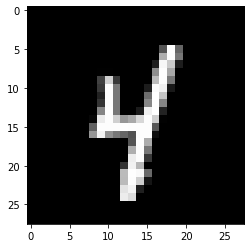

Label: 4


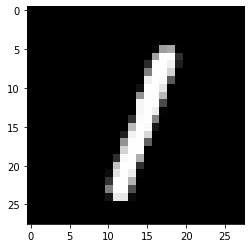

Label: 1


In [4]:
import matplotlib.pyplot as plt
mnist_example = ds_train.take(2)
for sample in mnist_example:
    image, label = sample[0].numpy(), sample[1].numpy()
    plt.imshow(image[:, :, 0].astype(np.uint8), cmap=plt.get_cmap("gray"))
    plt.show()
    print("Label: %d" % label)

In [5]:
mnist_example = ds_train.take(20)
X_train = []
Y_train = []
for sample in mnist_example:
    X_train.append(sample[0].numpy())
    Y_train.append(sample[1].numpy())
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [6]:
X_train.shape , Y_train.shape

((20, 28, 28, 1), (20,))

In [7]:
model = Model()
model.add(CNN(8,2,1))
model.add(Maxpool(2))
model.add(Relu(1352,40))
model.add(Softmax(40,10))
model.compile(X_train/255,Y_train,100)

Epoch: 1 ----------------- loss : 2.3179442360201357 ----------------- accuracy : 0.1
----------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------
Epoch: 2 ----------------- loss : 2.2193228427569527 ----------------- accuracy : 0.1
----------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------
Epoch: 3 ----------------- loss : 2.1884850269024296 ----------------- accuracy : 0.15
----------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------
Epoch: 4 ----------------- loss : 2.173070622930338 -----------

In [8]:
model.summary()

Conv_layer ====> input_shape : (28, 28, 1) ===========> output_shape : (26, 26, 8) ===========> paramaters : 40
Maxpool_layer ====> input_shape : (26, 26, 8) ===========> output_shape : (13, 13, 8) ===========> paramaters : 0
Relu_layer =======> input_shape : 1352 ===========> output_shape : 40 ===========> paramaters : 54120
Softmax_layer ====> input_shape : 40 ===========> output_shape : 10 ===========> paramaters : 410
layers : 4  ===========>  parameters : 54570
